In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip','r')
zip_ref.extractall('C:\Users\Nitin\Downloads\Cat-Dog-Classifier')
zip_ref.close()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2526046347.py, line 3)

## 1. Data Processing

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
base_dir = '/content/dogs_vs_cats'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'test')

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu', input_shape=(150,150,3) ),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation ='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation ='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation ='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation ='relu' ),
    tf.keras.layers.Dense(1, activation ='sigmoid' )

])

C:\Users\Nitin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(learning_rate= 1e-4),
    metrics =['accuracy']
)

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch =100,
    epochs = 10,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 301ms/step - accuracy: 0.6508 - loss: 0.6053 - val_accuracy: 0.6630 - val_loss: 0.5942
Epoch 2/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - accuracy: 0.6685 - loss: 0.6078 - val_accuracy: 0.7060 - val_loss: 0.5650
Epoch 3/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 282ms/step - accuracy: 0.6854 - loss: 0.5856 - val_accuracy: 0.6950 - val_loss: 0.5609
Epoch 4/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 289ms/step - accuracy: 0.6725 - loss: 0.5948 - val_accuracy: 0.6900 - val_loss: 0.5877
Epoch 5/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.6789 - loss: 0.6009 - val_accuracy: 0.6910 - val_loss: 0.5815
Epoch 6/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.6608 - loss: 0.6058

AttributeError: 'NoneType' object has no attribute 'items'

In [17]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

KeyError: 'accuracy'

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
def predict_image(image_path):
  img = image.load_img(image_path, target_size=(150,150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor /= 255.

  prediction = model.predict(img_tensor)
  print('Prediction:', 'Dog'if prediction[0]>0.5 else 'Cat')


In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dogs_vs_cats/test/cats/cat.10.jpg')

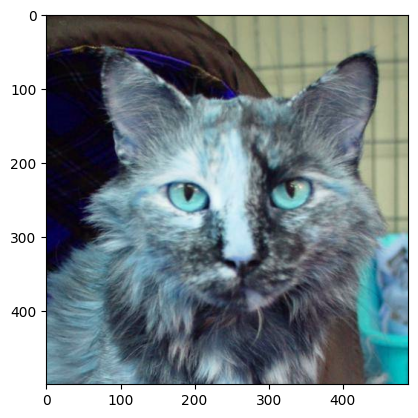

In [ ]:
plt.imshow(test_img)

In [ ]:
predict_image('/content/dogs_vs_cats/test/cats/cat.10.jpg')

1/1 [==============================] - 0s 19ms/step
Prediction: Cat


In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dogs_vs_cats/test/dogs/dog.10021.jpg')

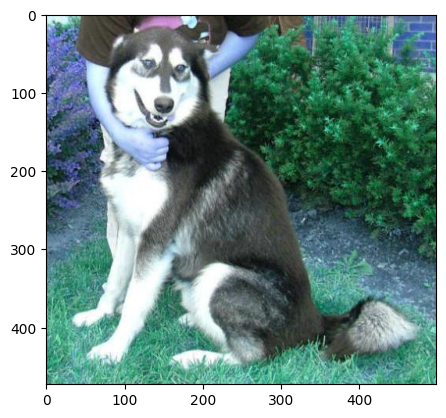

In [ ]:
plt.imshow(test_img)

In [ ]:
predict_image('/content/dogs_vs_cats/test/dogs/dog.10021.jpg')

1/1 [==============================] - 0s 18ms/step
Prediction: Dog
